In [19]:
import yfinance as yf
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [20]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [21]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-14 00:00:00-04:00,5442.359863,5463.220215,5415.910156,5455.209961,3380050000,0.0,0.0
2024-08-15 00:00:00-04:00,5501.129883,5546.229980,5501.129883,5543.220215,3723310000,0.0,0.0
2024-08-16 00:00:00-04:00,5530.500000,5561.979980,5525.169922,5554.250000,3357690000,0.0,0.0


In [22]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-08-07 00:00:00-04:00', '2024-08-08 00:00:00-04:00',
               '2024-08-09 00:00:00-04:00', '2024-08-12 00:00:00-04:00',
               '2024-08-13 00:00:00-04:00', '2024-08-14 00:00:00-04:00',
               '2024-08-15 00:00:00-04:00', '2024-08-16 00:00:00-04:00',
               '2024-08-19 00:00:00-04:00', '2024-08-20 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24275, freq=None)

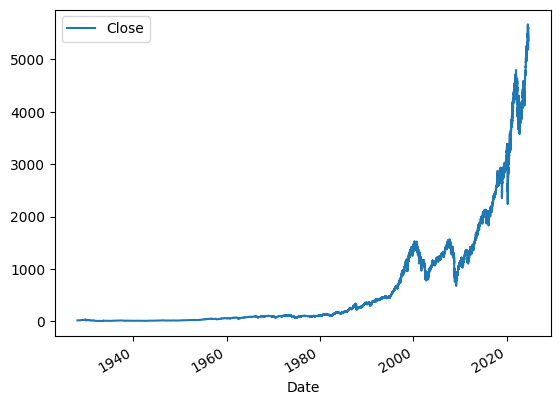

In [23]:
import numpy as np
ax = sp500.plot.line(y="Close", use_index=True)

In [24]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [25]:
 sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [26]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-08-14 00:00:00-04:00,5442.359863,5463.220215,5415.910156,5455.209961,3380050000,5543.220215
2024-08-15 00:00:00-04:00,5501.129883,5546.229980,5501.129883,5543.220215,3723310000,5554.250000
2024-08-16 00:00:00-04:00,5530.500000,5561.979980,5525.169922,5554.250000,3357690000,5608.250000


In [27]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [28]:
sp500.shape

(24275, 7)

In [29]:
 sp500 = sp500.loc["1990-01-01":].copy()

In [30]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-08-14 00:00:00-04:00,5442.359863,5463.220215,5415.910156,5455.209961,3380050000,5543.220215,1
2024-08-15 00:00:00-04:00,5501.129883,5546.229980,5501.129883,5543.220215,3723310000,5554.250000,1
2024-08-16 00:00:00-04:00,5530.500000,5561.979980,5525.169922,5554.250000,3357690000,5608.250000,1


In [31]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [32]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-13 00:00:00-04:00,5376.979980,5436.500000,5376.979980,5434.430176,3648980000,5455.209961,1,1.008353,2.0,1.019907,4.0,1.001789,37.0,1.106940,143.0,1.262723,528.0
2024-08-14 00:00:00-04:00,5442.359863,5463.220215,5415.910156,5455.209961,3380050000,5543.220215,1,1.001908,2.0,1.014074,5.0,1.005150,37.0,1.110222,144.0,1.266945,528.0
2024-08-15 00:00:00-04:00,5501.129883,5546.229980,5501.129883,5543.220215,3723310000,5554.250000,1,1.008002,2.0,1.021927,5.0,1.020630,37.0,1.127057,145.0,1.286754,528.0


In [33]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=1)
xgb_model = XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=1)

ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('xgb', xgb_model)
], voting='soft')

In [34]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [37]:
import pandas as pd

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [38]:
predictions = backtest(sp500, ensemble_model, new_predictors)

In [76]:
predictions["Predictions"].value_counts()

Predictions
0.0    3288
1.0     935
Name: count, dtype: int64

In [39]:
from sklearn.metrics import precision_score

precision_score(predictions["Target"], predictions["Predictions"])

0.5610098176718092